# 머신러닝 맛보기 1편

__참고:__ 오렐리앙 제롱의 [<핸즈온 머신러닝(2판)>](https://github.com/ageron/handson-ml2) 
4장 1절의 소스코드 일부를 사용합니다.

## 주요 내용

머신러닝은 특정 값을 예측하는 모델(일종의 함수)을 구현하는 컴퓨터 프로그래밍 분야이며
주어진 문제에 대한 적절한 모델을 찾는 일이 핵심 과제이다.
머신러닝은 데이터 분석의 주요 활용분야가 되었으며 지금까지 살펴 본 파이썬 데이터 분석의 다양한 개념과 도구들이
유용하게 활용된다.
여기서는 선형회귀 모델의 개념과 활용을 간단한 예제를 이용하여 
머신러닝의 기본 아이디어를 전달한다.

## 기본 설정

- 필수 모듈 불러오기
- 그래프 출력 관련 기본 설정 지정

In [1]:
import numpy as np

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 머신러닝 모델 훈련

머신러닝 모델의 훈련 과정에 필요한 요소는 __모델__과 __훈련 데이터셋__이다.
그리고 모델과 훈련 데이터셋에 따라 훈련 방식이 결정되며, 머신러닝과 딥러닝 분야에서 다양한 훈련 기법을 연구한다.
또한 어떤 모델과 어떤 훈련 데이터셋을 사용하느냐에 따라 모델 훈련의 결과가 매우 달라질 수 있다.
여기서는 간단한 선형회귀 모델의 훈련과정을 구체적으로 살펴보면서 머신러닝 모델 훈련을 소개한다.

## 선형회귀 모델 훈련

먼저 머신러닝 모델 훈련에 사용되는 데이터 훈련 세트는 $m \times n$ 모양의 2차원 어레이로 표현됨을 기억해야 한다.

- $m$: 훈련 세트 크기, 즉 훈련 데이터 샘플의 개수.
- $n$: 훈련 데이터 샘플의 특성 수. 즉, 훈련 데이터 샘플을 표현하는 1차원 어레이의 길이.
    어레이 각각의 항목을 특성이라 부름.
- $\mathbf{x}_{j}^{(i)}$: $i$ 번째 훈련 입력 데이터 샘플의 $j$번째 특성값.

$$
\mathbf{X}_{\textit{train}} = 
\begin{bmatrix}
\mathbf{x}_{1}^{(1)} & \mathbf{x}_{2}^{(1)} & \cdots & \mathbf{x}_{n}^{(1)}\\
\mathbf{x}_{1}^{(2)} & \mathbf{x}_{2}^{(2)} & \cdots & \mathbf{x}_{n}^{(2)}\\
 & \vdots & \\
\mathbf{x}_{1}^{(m)} & \mathbf{x}_{2}^{(m)} & \cdots & \mathbf{x}_{n}^{(m)}
\end{bmatrix}
$$

아래 코드는 선형회귀 학습과정을 설명하기 위해 사용되는 하나의 특성을 사용하는
간단한 훈련 데이터를 생성한다. 

* `X`: 훈련 세트. 하나의 특성 `x1`을 갖는 100개의 데이터. 즉, $m=100$, $n=1$.
* `y`: 100 개의 레이블. 기본적으로 `4 + 3 * x`의 형식을 따르나 훈련을 위해 잡음(noise)를 추가 했음.

__참고:__ 정규분포를 따르는 부동소수점 100개를 무작위로 생성하여 잡음으로 사용하였다.

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)   # X와 y의 관계를 1차 함수로 표현

In [3]:
X.shape

(100, 1)

In [4]:
y.shape

(100, 1)

특성 `x1`과 레이블 `y`의 관계를 그리면 다음과 같다.
기본적으로 `y = 4 + 3 * x` 의 선형관계를 갖지만 잡음으로 인해 데이터가 퍼져 있다.

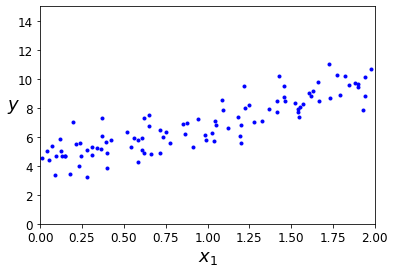

In [5]:
plt.plot(X, y, "b.")                          # 파랑 점: 훈련 세트 산점도
plt.xlabel("$x_1$", fontsize=18)              # x축 표시
plt.ylabel("$y$", rotation=0, fontsize=18)    # y축 표시
plt.axis([0, 2, 0, 15])                       # x축, y축 스케일 지정
plt.show()

### 정규 방정식

이제 $x_1$과 $y$가 어떻게 생성되었는지 모른다는 가정 하에 두 변수 사이의 관계를 찾는 게 목표이다.
즉, 아래 식을 만족시키는 최적의 $\theta_0$, $\theta_1$을 찾아야 한다.

$$
\begin{align*}
y^{(1)} &= \theta_0 + \theta_1 \cdot x_1^{(1)} \\
y^{(2)} &= \theta_0 + \theta_1 \cdot x_1^{(2)} \\
&= \cdots \\
y^{(100)} &= \theta_0 + \theta_1 \cdot x_1^{(100)} 
\end{align*}
$$

이를 행렬식으로 표현하면 다음과 같다.

$$
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(100)}
\end{bmatrix}
= 
\begin{bmatrix}
1 & \mathbf{x}_{1}^{(1)} \\
1 & \mathbf{x}_{1}^{(2)} \\
 & \vdots \\
1 & \mathbf{x}_{1}^{(m)}
\end{bmatrix}
\cdot
\begin{bmatrix}
\theta_0 \\
\theta_1
\end{bmatrix}
$$

일반적으로는 훈련 데이터의 각 샘플이 $n \ge 1$ 개의 특성을 가지며, 따라서 아래 식을
만족하는 $\theta_0, \theta_1, \dots, \theta_n$을 찾아야 한다.

$$
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(100)}
\end{bmatrix}
= 
\begin{bmatrix}
1 & \mathbf{x}_{1}^{(1)} & \mathbf{x}_{2}^{(1)} & \cdots & \mathbf{x}_{n}^{(1)}\\
1 & \mathbf{x}_{1}^{(2)} & \mathbf{x}_{2}^{(2)} & \cdots & \mathbf{x}_{n}^{(2)}\\
 & & \vdots & \\
1 & \mathbf{x}_{1}^{(m)} & \mathbf{x}_{2}^{(m)} & \cdots & \mathbf{x}_{n}^{(m)}
\end{bmatrix}
\cdot
\begin{bmatrix}
\theta_0 \\
\theta_1\\
\theta_2 \\
\vdots \\
\theta_n \\
\end{bmatrix}
$$

이 과정을 보다 단순하게 표현하면 다음과 같다.

길이가 $m$인 1차원 어레이 $\mathbf{y}$와 $(m, n+1)$ 모양의 2차원 어레이 $\mathbf{X}$가 주어졌을 때,
아래 식을 만족시키면서 길이가 $n+1$인 1차원 어레이 $\hat{\boldsymbol{\theta}}$를 구해야 한다. 

$$
\mathbf{y} = \mathbf{X} \,\hat{\boldsymbol{\theta}}
$$

만약에 $(\mathbf{X}^T \mathbf{X})$의 역행렬 $(\mathbf{X}^T \mathbf{X})^{-1}$이 존재하고 
실제로 일정 시간 내에 계산이 가능하다면 최적의 
파라미터 조합 $\boldsymbol{\hat\theta}$을 아래 __정규 방정식__으로 직접 구할 수 있다.

$$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

### 정규 방정식 활용

아래 코드는 위 정규 방정식을 이용하여 위에서 생성한 100개의 훈련 샘플이 포함된
훈련 세트에 대한 최적의 $\theta_0, \theta_1$을 계산한다.

__주의사항:__

* `np.ones((100, 1))`: 절편 $\theta_0$를 고려하기 위해 훈련 세트의 0번 열에 추가되는 1로 이루어진 벡터.
* `X_b`: 모든 샘플에 대해 `1`이 0번 인덱스체 추가된 훈련 세트를 나타내는 2차원 어레이

In [6]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1 추가
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

이제 정규 방정식을 활용할 수 있다.

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

계산된 $\boldsymbol{\hat\theta} = [\theta_0, \theta_1]$ 은 다음과 같다.

In [8]:
theta_best

array([[4.21509616],
       [2.77011339]])

## 사이킷런의 `LinearRegression` 모델

사이킷런(scikit-learn) 라이브러리는 머신러닝에서 사용되는 다양한 모델의 기본적인 틀(basic models)들을 제공한다.
선형회귀의 경우 `LinearRegression` 클래스의 객체를 생성하여 훈련시키면 
최적의 절편과 기울기를 계산해준다. 
모델을 지정하고 훈련시키는 과정은 다음과 같다.

먼저 선형회귀 모델의 객체를 생성한다.

In [9]:
from sklearn import linear_model

lin1 = linear_model.LinearRegression()

사이킷런의 모델은 1 벡터(1로만 이루어진 벡터)를 추가하는 과정을 알아서 처리한다.
다만, 입력 데이터와 타깃 데이터 모두 2차원 어레이로 지정해야 한다.

In [10]:
X_train = np.c_[X]
y_train = np.c_[y]

이제 `fit()` 메서드를 호출하여 모델을 훈련시킨다.

In [11]:
lin1.fit(X_train, y_train)

LinearRegression()

훈련으로 학습된 모델이 알아된 최적의 $\theta_0, \theta_1$이 
앞서 정규 방정식을 이용한 결과와 동일하다. 

In [12]:
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]

print(f"절편:\t {t0}t1")
print(f"기울기:\t {t1}t1")

절편:	 4.215096157546746t1
기울기:	 2.770113386438484t1


### 학습된 모델

훈련된 예측 모델은
$\theta_0$ 을 절편으로, $\theta_1$ 을 기울기로 하는 직선에 해당한다.
예측 모델을 나타내는 1차 함수의 그래프를 그리기 위해
먼저 직선 상에 위치한 두 점을 지정한다.

In [13]:
X_new = np.array([[0], [2]])

두 점에 대한 예측값을 계산한다. 

In [14]:
y_predict = lin1.predict(X_new)

이제 훈련 세트의 산점도와 앞서 구한 두 점을 잇는 직선, 즉 예측 모델의 그래프를 그리면 다음과 같다.

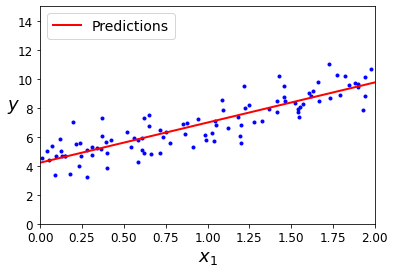

In [15]:
# 훈련 세트의 산점도: 파란 점으로 표시
plt.plot(X, y, "b.") 

# 예측 모델: 1차 함수 그래프: 빨강 직선
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.legend(loc="upper left", fontsize=14)                          # 범례 위치
plt.axis([0, 2, 0, 15])                                            # x축, y축 스케일 지정

plt.show()

## 무어-펜로즈(Moore-Penrose) 역행렬

앞서 소개한 정규 방정식은 $(\mathbf{X}^T \mathbf{X})$의 역행렬 $(\mathbf{X}^T \mathbf{X})^{-1}$이
존재할 때만 사용할 수 있다.
하지만 그렇지 않은 경우 행렬의 특잇값 분해(SVD)를 사용할 때 얻어지는
$\mathbf{X}$의 무어-펜로즈 역행렬 $\mathbf{X}^+$을 이용하여
$\boldsymbol{\hat\theta}$의 근사값을 계산할 수 있다.

$$
\hat{\boldsymbol{\theta}} = \mathbf{X}^+ \mathbf{y}
$$


사이킷런의 `LinearRegression` 모델이 바로 이 무어-펜로즈 역행렬을 이용한다. 

__참고:__ 무어-펜로즈 역행렬을 __유사역행열__이라고도 부른다.

### 무어-펜로즈 역행렬 계산의 한계

앞선 언급한 무어-펜로즈 역행렬을 구하는 알고리즘의 계산 복잡도는 $O(n^2)$이다.
즉, 역행렬 계산 시간이 특성 수의 제곱에 비례한다.

예를 들어, 1만개의 행을 갖는 단위행렬의 무어-펜로즈 역행렬을 계산하는 데에 3분 30초 정도 걸린다.
만약에 10만개의 행을 갖는 단위행렬을 사용하면 그의 100배인 350분, 즉 6시간 정도의 시간이 걸릴 것이다.

__경고:__ 아래 코드는 컴퓨터 사양에 따라 3분 이상 걸릴 수 있다.

In [16]:
import time

X = np.eye(10000)

start = time.time()       # 계산 시작
np.linalg.pinv(X)
end = time.time()         # 계산 완료

duration = end - start   # 계산 경과 시간

In [17]:
print(f"{duration:.1f} 초")

214.4 초


따라서 많은 수의 특성을 사용하는 데이터에 대해서는 사이킷런의 `LinearRegrssion` 모델은
현실적으로 사용될 수 없다.
이에 대한 대안으로 경사 하강법을 적용해야 하며, 경사하강법을 적용하는 다양한 모델을
구현하는 것이 머신러닝과 딥러닝의 주요 주제이다.